3.6.9
plotted # of time step 100
x cell # 8


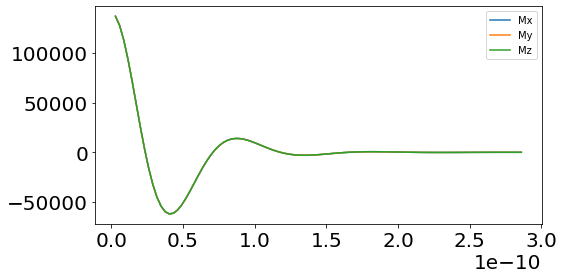

In [35]:
# Import statements
from platform import python_version
print(python_version())
import yt ; 
yt.funcs.mylog.setLevel(50)
import numpy as np
import scipy.constants as scc
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 24
import math
import cmath
import os
# save numpy array as csv file
# from np import asarray
# from np import savetxt

#%matplotlib notebook
Mx_tarray = np.zeros((3000,1))   # initialize the Mx time sequence for saving data
My_tarray = np.zeros((3000,1))   # initialize the My time sequence for saving data
Mz_tarray = np.zeros((3000,1))   # initialize the Mz time sequence for saving data
t_tarray = np.zeros((3000,1))
iteration = 0
dt_iter = 10
n_element = 0
while iteration < 1000 :
    ds = yt.load( './diags/plt'+str(iteration).zfill(5) ) # Create a dataset object\n",
    ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
    nt = iteration
    dt = 2.888749802e-13 # changes in different simulation setup
    t = iteration * dt
    t_tarray[n_element] = t
    xCell = ds.domain_dimensions[0]
    yCell = ds.domain_dimensions[1]
    zCell = ds.domain_dimensions[2]
    z_array = ad0['z'].to_ndarray()
    Mx_array = ad0['Mx_xface'].to_ndarray()
    My_array = ad0['My_yface'].to_ndarray()
    Mz_array = ad0['Mz_zface'].to_ndarray()
    Mx_record = Mx_array[int(xCell/2),int(yCell/2),int(zCell/2)]
    My_record = My_array[int(xCell/2),int(yCell/2),int(zCell/2)]
    Mz_record = Mz_array[int(xCell/2),int(yCell/2),int(zCell/2)]
    Mx_tarray[n_element] = Mx_record
    My_tarray[n_element] = My_record
    Mz_tarray[n_element] = Mz_record
    # print("time sequence", t)
    #print("Mx", Mx_record)
    #print("My", My_record)
    #print("Mz", Mz_record)
    #print("Ex", Ex_array)
    iteration = iteration + dt_iter
    n_element = n_element + 1

# savetxt('data.csv', Mx_tarray[1:n_element], delimiter=',')
print("plotted # of time step", n_element)
plt.figure(figsize=(8,4))
plt.plot(t_tarray[1:n_element],Mx_tarray[1:n_element])
plt.figure(figsize=(8,4))
plt.plot(t_tarray[1:n_element],My_tarray[1:n_element])
plt.figure(figsize=(8,4))
plt.plot(t_tarray[1:n_element],Mz_tarray[1:n_element])
plt.legend(["Mx", "My", "Mz"])
print("x cell #", xCell)

#plt.ylim(-2, 2)
#plt.xlim(-1.5e-6, 1.5000001e-6)
#plt.xticks(np.arange(-1.5e-6, 1.500001e-6, step=0.5e-6))
#plt.xlabel('z (m)')
#plt.ylabel('Mx (V/m)')
#max_Mx = max(Mx_array[int(xCell/2), int(yCell/2), int(zCell/2):zCell])
#print(max_Mx)
#plt.axvspan(192.e-3, 256.e-3, color='green', alpha=0.5)
#plt.savefig(str(iteration).zfill(5)+'.png',bbox_inches = "tight")
    